<a href="https://colab.research.google.com/github/Koush98/Koush98/blob/main/Toyta_Eda_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:

# Loading the Dataset
df = pd.read_csv('/content/Toyota (1).csv')

In [49]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


We Can see the data has an unnamed column so we again reading it but skiping the unnamed column and storing it in df1.

In [54]:

# Again Loading the Dataset
df1 = pd.read_csv('/content/Toyota (1).csv',index_col=0)

In [56]:
df1.head() #We can see the unnamed column has removed.

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
df1["Doors"].replace({'three':3,'four':4,'five':5},inplace=True)

In [58]:
# Check for missing values in the dataset
df1.isnull().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [60]:
# Handling Missing Values

# Step 1: Handling missing values for 'Age' column
# Assuming 'Age' column represents the age of the car in years
# Filling missing 'Age' values with the median age of the cars
df1['Age'].fillna(df1['Age'].median(), inplace=True)

# Step 2: Handling missing values for 'FuelType' column
# Assuming 'FuelType' is a categorical variable
# Filling missing 'FuelType' values with the most common (mode) fuel type
df1['FuelType'].fillna(df1['FuelType'].mode()[0], inplace=True)

# Step 3: Handling missing values for 'MetColor' column
# Assuming 'MetColor' indicates metallic color (binary: 0 or 1)
# Fill missing 'MetColor' values with the most common value (mode)
df1['MetColor'].fillna(df1['MetColor'].mode()[0], inplace=True)

# Step 4: Verifying that there are no more missing values
print(df1.isnull().sum())

# Now We can save the cleaned dataset if needed but i am not saving it
# df.to_csv('cleaned_dataset.csv', index=False)

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


In [62]:
# Summary statistics for numerical columns
df1.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.973538,0.708914,0.055710,1566.827994,1072.45961
std,3626.964585,17.964211,0.454421,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,44.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,68.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


Key Insights:
Pricing: The median price is 9,900, with prices skewed towards the lower end, as indicated by a higher maximum value.
Car Age: Most cars are relatively young, with a median age of 60 months.
Metallic Color: A significant majority of cars have a metallic color.
Transmission: Manual transmission cars dominate the dataset.
Engine Capacity and Weight: Most cars have mid-range engine capacities (around 1600 cc) and weights (around 1070 kg).
These statistics provide a comprehensive overview of the dataset, highlighting typical characteristics and distributions of the cars listed.

In [64]:
# Check the data types of each column
df1.dtypes

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

In [71]:
# we can see that the KM and HP columns are having object data types but they have the numerical values
#Converting 'KM' and 'HP' columns to numeric types, handling non-numeric values
# 'KM' and 'HP' might have non-numeric characters, we'll coerce errors

df1['KM'] = pd.to_numeric(df1['KM'], errors='coerce')
df1['HP'] = pd.to_numeric(df1['HP'], errors='coerce')

In [73]:
df1.dtypes
# Again checking the dtypes. Now we can see that the KM amd HP columns have the float data types.

Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

In [74]:
#Also checking again if some missing value has come or not
df1.isnull().sum()

Price         0
Age           0
KM           15
FuelType      0
HP            6
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64

In [75]:
# we can see we have some missing values now we again replace the missing values

#Filling missing 'KM', 'HP' values with their respective median values
df1['KM'].fillna(df1['KM'].median(), inplace=True)
df1['HP'].fillna(df1['HP'].median(), inplace=True)

In [77]:

#Again verifying the missing values
df1.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

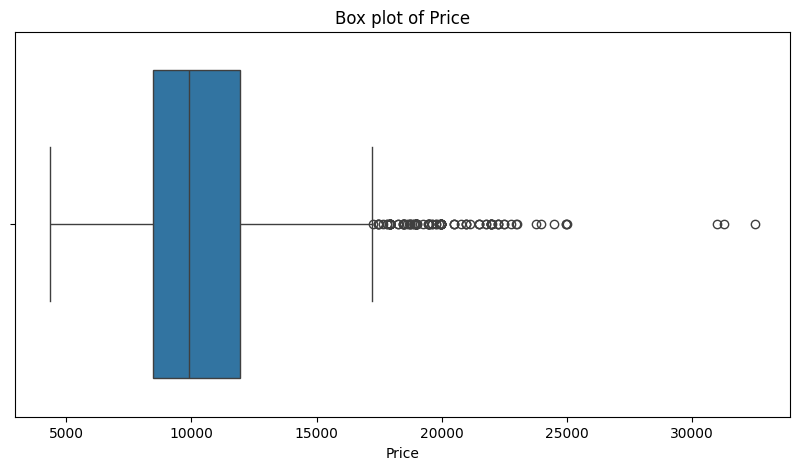

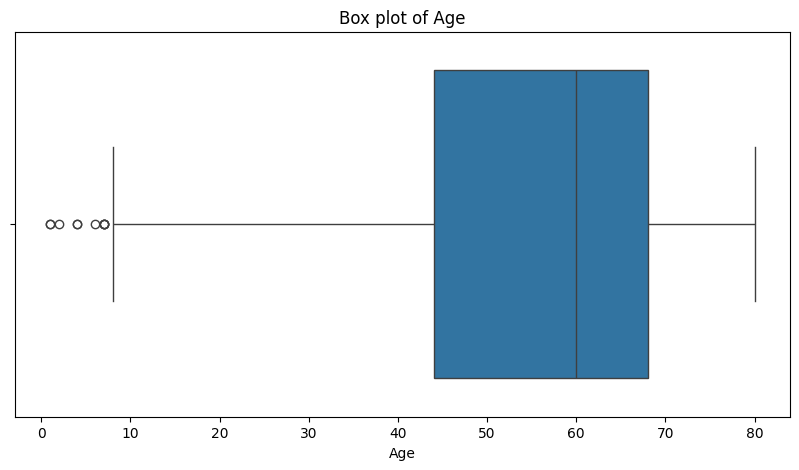

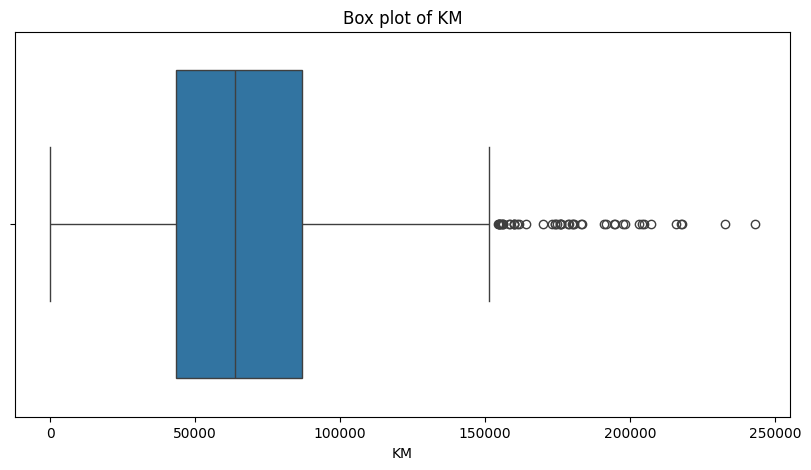

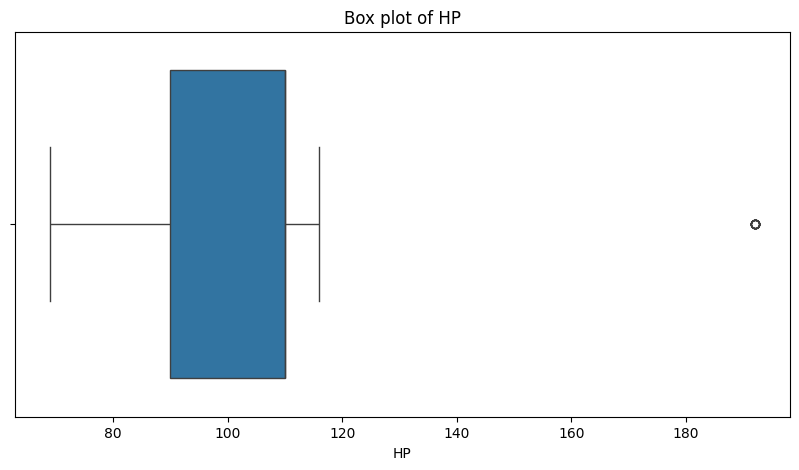

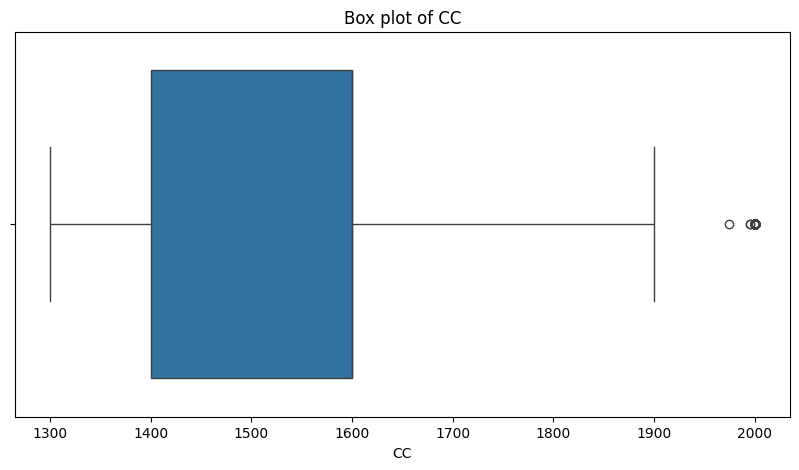

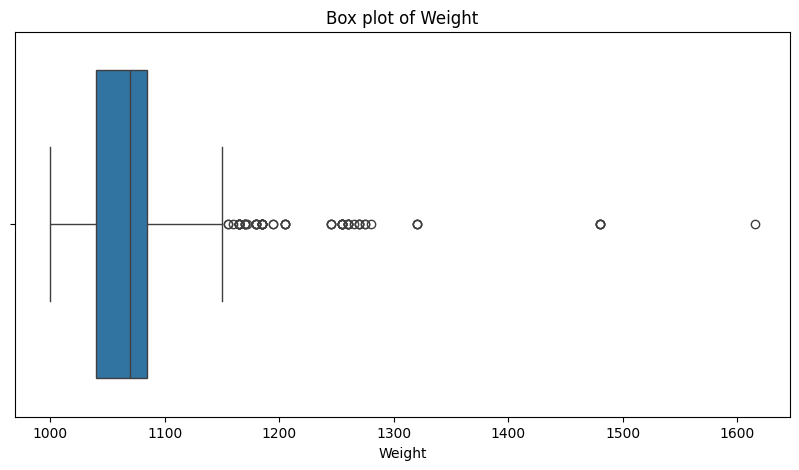

In [98]:
# Detect and handle outliers
# Visualize outliers using box plots
numerical_features = ['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [79]:
df1[df1["Price"]>30000]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,60.0,1.0,Petrol,116.0,0.0,0,2000,5,1480
110,31000,4.0,4000.0,Diesel,116.0,1.0,0,2000,5,1480
111,31275,4.0,1500.0,Diesel,116.0,1.0,0,2000,5,1480


In [80]:
df1[df1["Age"]<10]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
110,31000,4.0,4000.0,Diesel,116.0,1.0,0,2000,5,1480
111,31275,4.0,1500.0,Diesel,116.0,1.0,0,2000,5,1480
112,24950,8.0,63634.0,Diesel,116.0,1.0,0,2000,5,1320
113,24950,8.0,13253.0,Diesel,116.0,1.0,0,2000,5,1320
114,22950,7.0,10000.0,Diesel,116.0,1.0,0,2000,5,1270
115,24990,8.0,6000.0,Diesel,90.0,1.0,0,2000,5,1280
116,21950,8.0,10841.0,Petrol,90.0,1.0,0,2000,5,1270
162,19600,9.0,7650.0,Petrol,110.0,1.0,0,1600,5,1115
169,17795,9.0,1.0,Petrol,98.0,1.0,0,1400,4,1065
170,18245,9.0,1.0,Petrol,110.0,1.0,0,1600,5,1075


In [88]:
df1[df1["CC"]==2000]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1195,8750,74.0,89800.0,Diesel,72.0,1.0,0,2000,3,1115
1202,6950,73.0,88186.0,Diesel,72.0,1.0,0,2000,3,1115
1216,8500,70.0,85864.0,Diesel,72.0,1.0,0,2000,5,1135
1320,9400,69.0,67092.0,Diesel,72.0,1.0,0,2000,3,1115


In [95]:
df1[df1["Weight"]>1400]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,60.0,1.0,Petrol,116.0,0.0,0,2000,5,1480
110,31000,4.0,4000.0,Diesel,116.0,1.0,0,2000,5,1480
111,31275,4.0,1500.0,Diesel,116.0,1.0,0,2000,5,1480
221,12450,44.0,74172.0,Petrol,110.0,1.0,0,1600,5,1615
960,9390,66.0,50806.0,Petrol,86.0,0.0,0,1300,3,1480


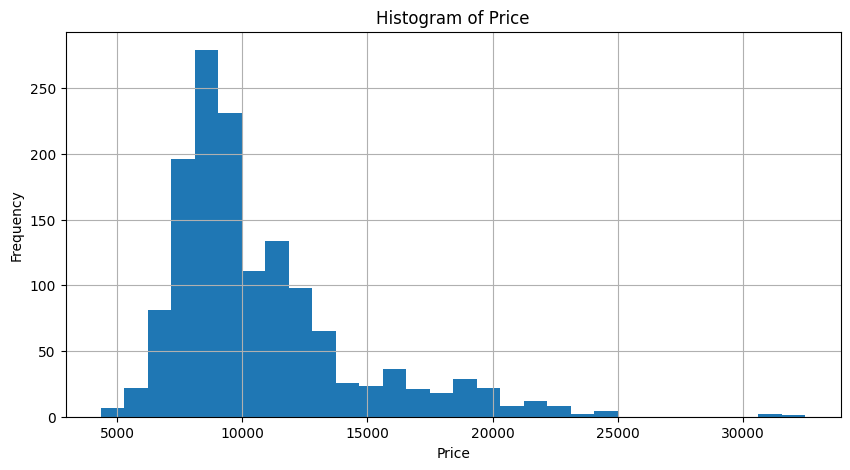

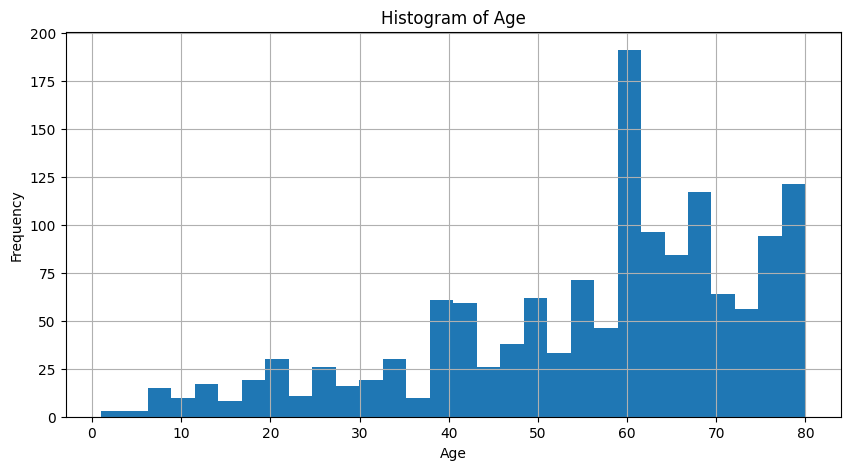

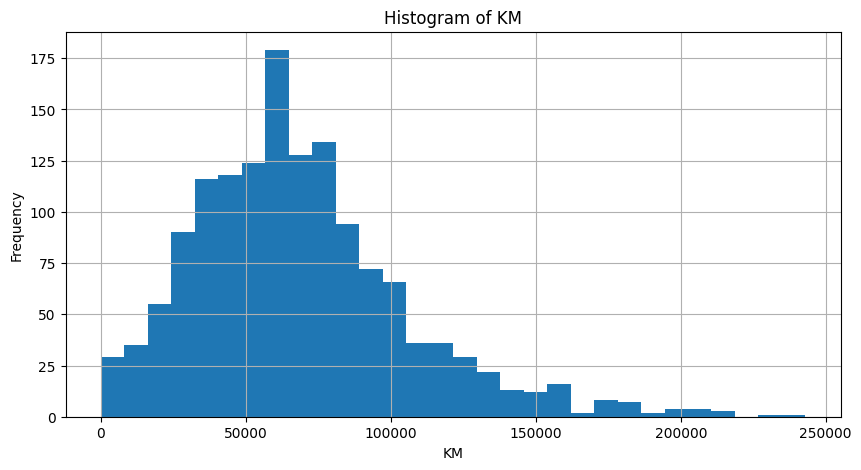

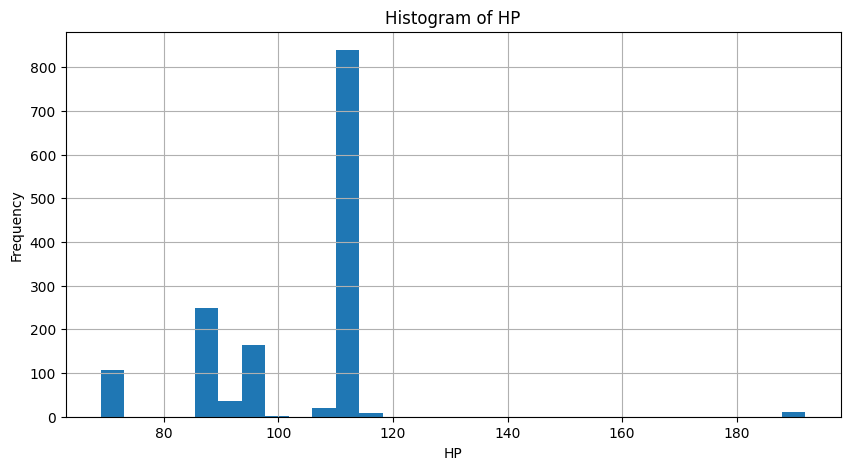

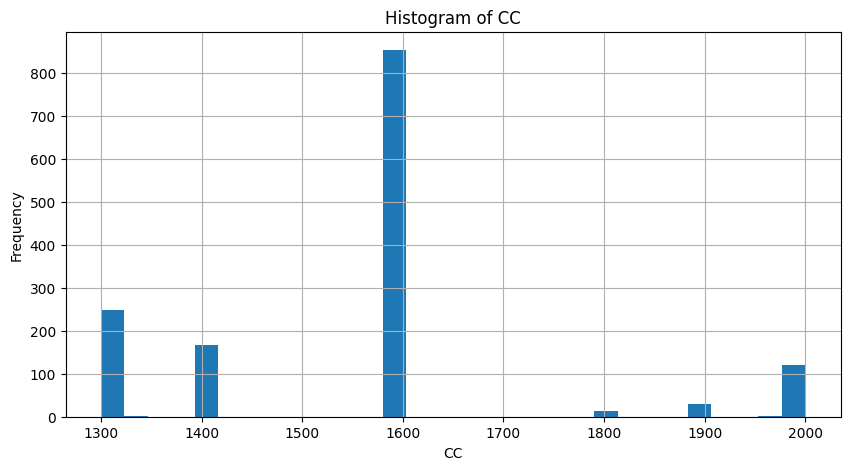

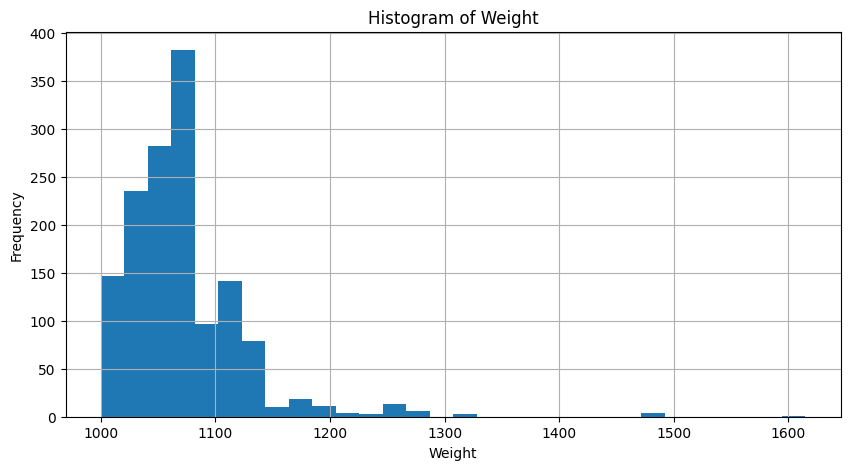

In [99]:
# Univariate Analysis
# Ploting histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    df1[feature].hist(bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

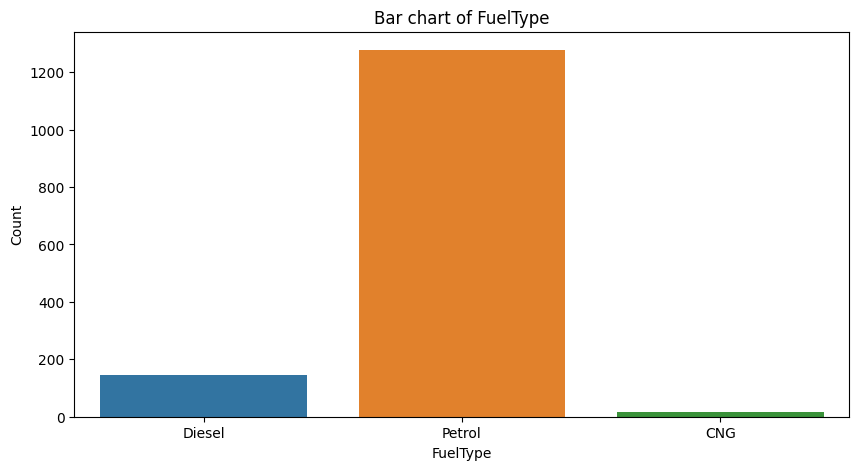

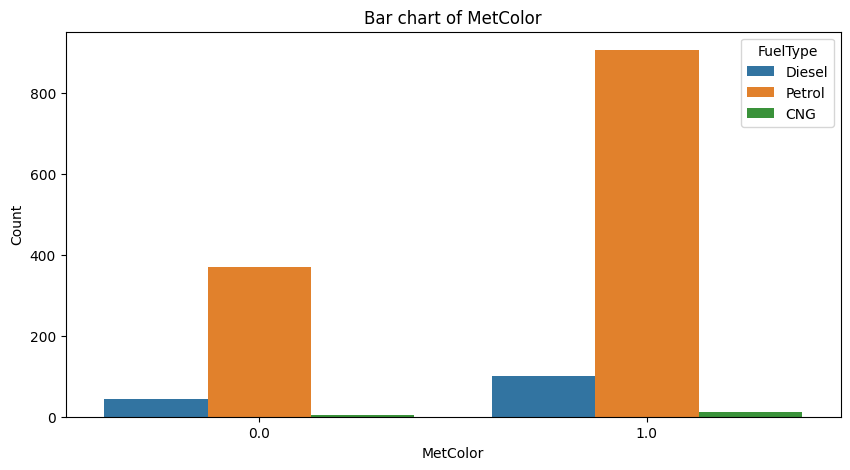

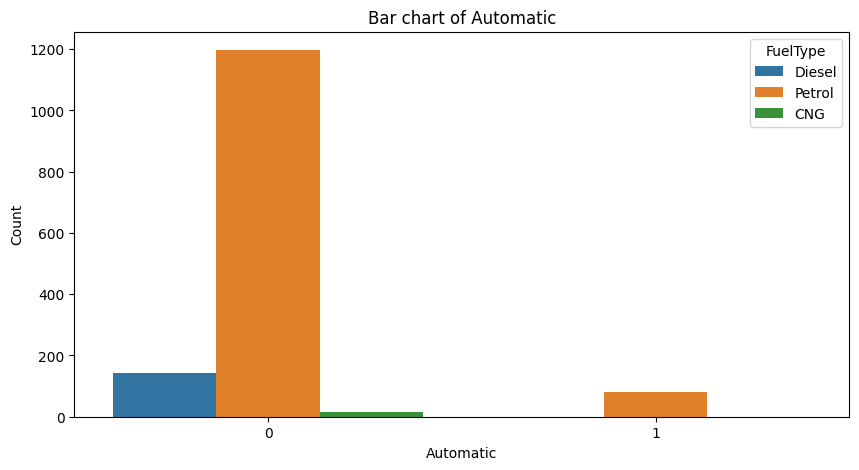

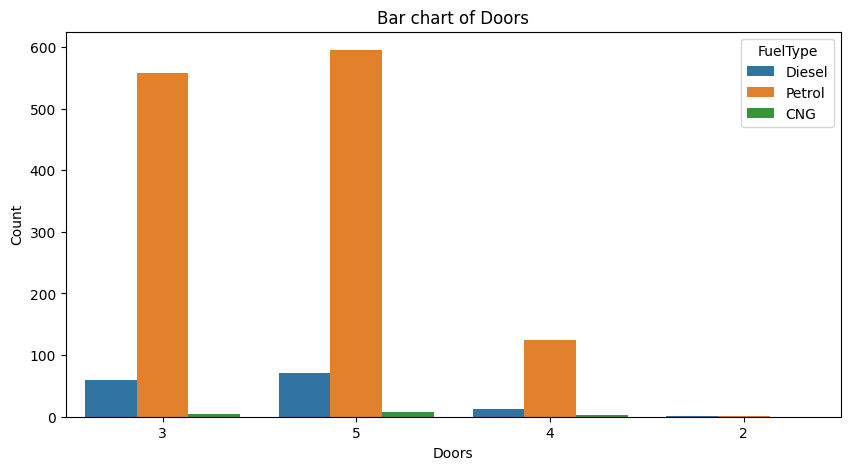

In [106]:

# Plotting bar charts for categorical features
categorical_features = ['FuelType', 'MetColor', 'Automatic','Doors']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df1[feature], hue="FuelType", data=df1)
    plt.title(f'Bar chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

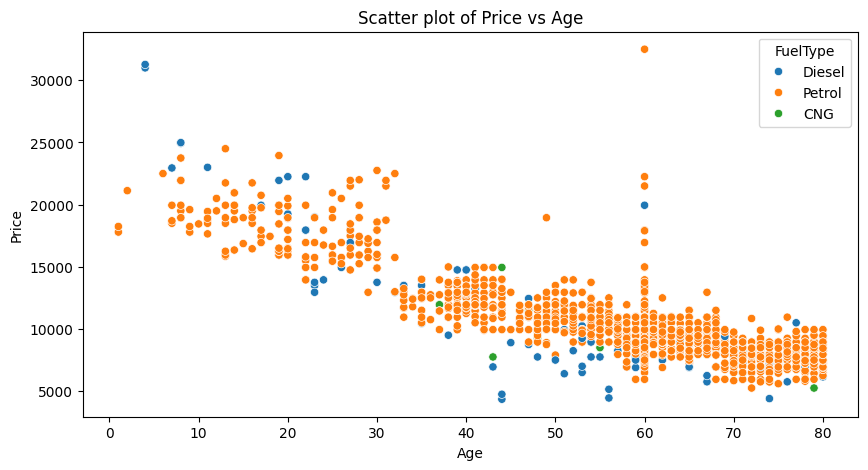

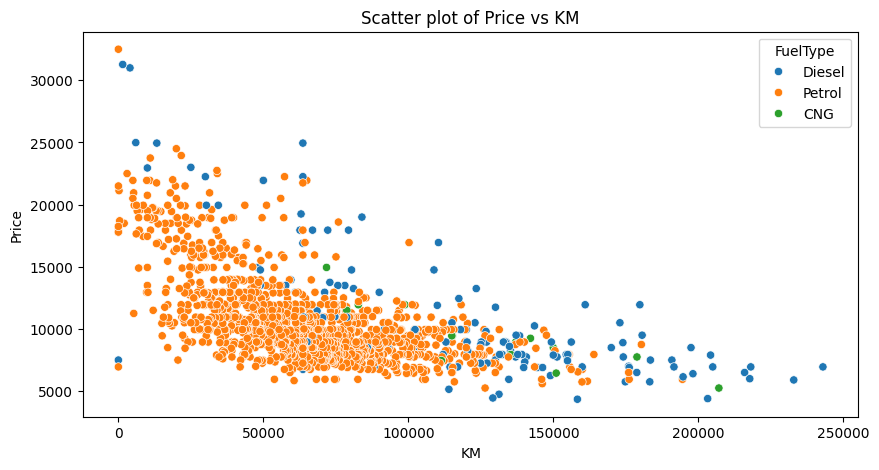

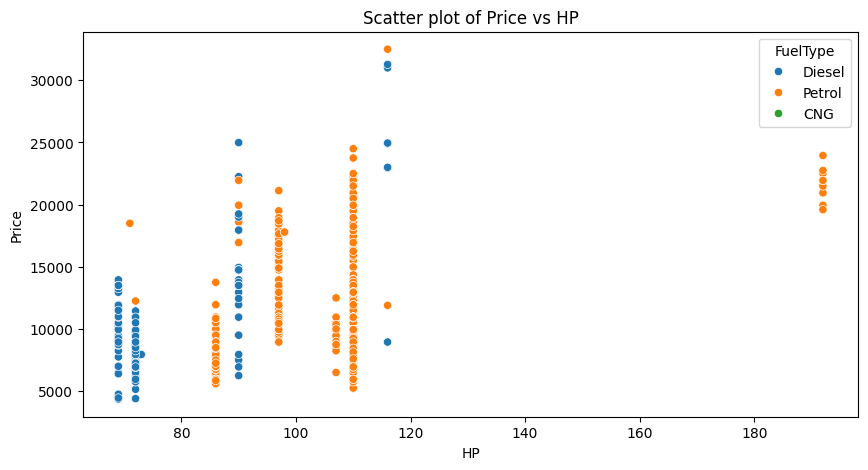

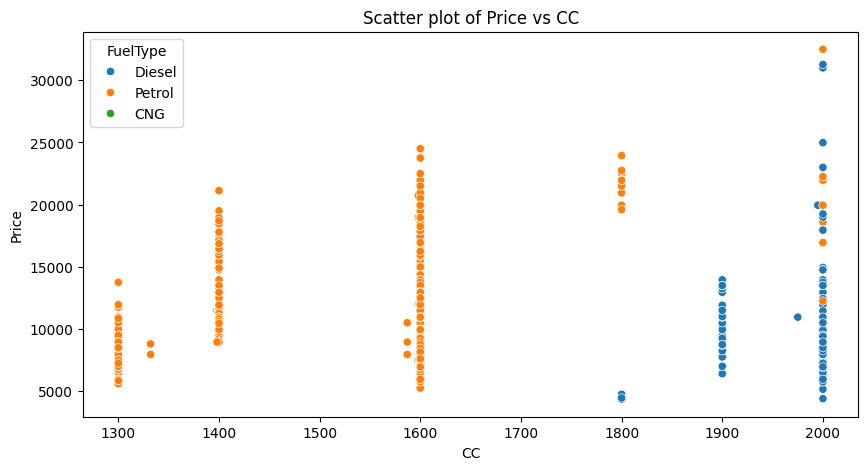

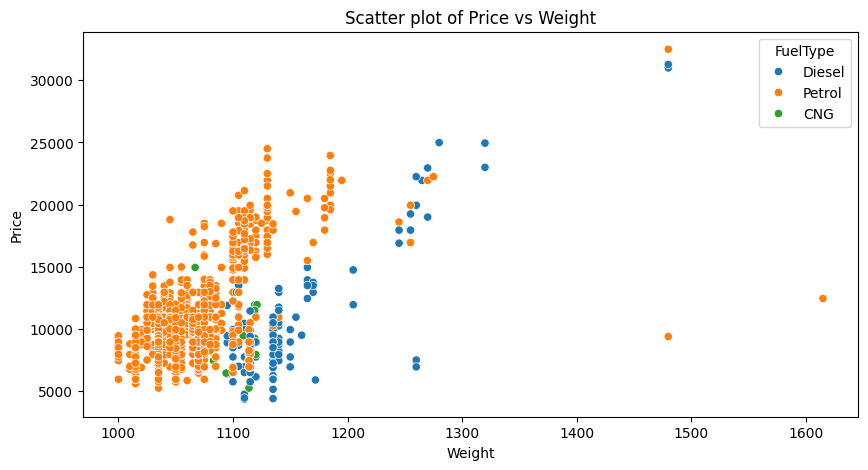

In [109]:
# Bivariate Analysis
# Scatter plots for numerical features
for feature in numerical_features:
    if feature != 'Price':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df1[feature], y=df1['Price'], hue =df1["FuelType"])
        plt.title(f'Scatter plot of Price vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

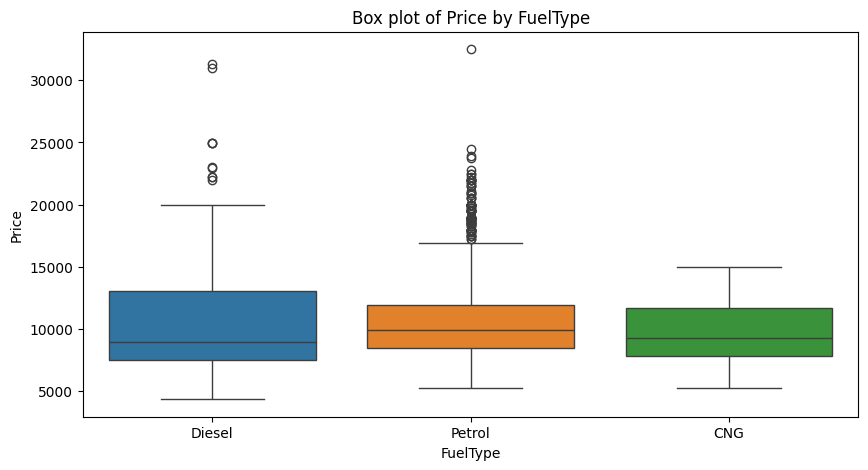

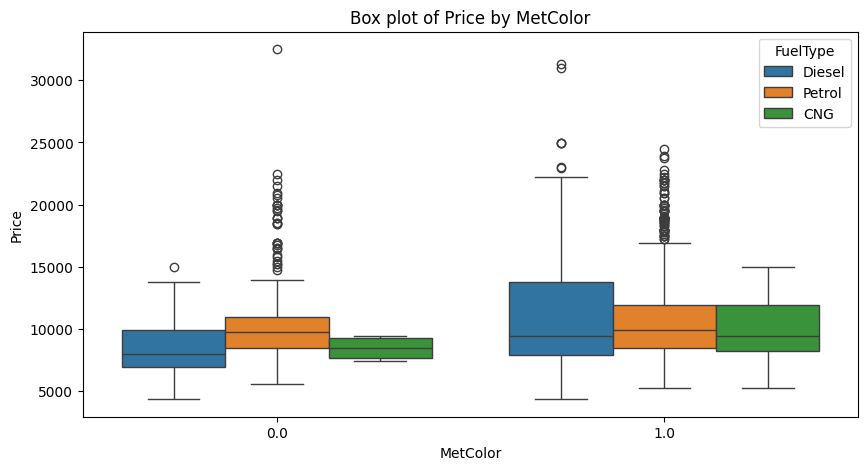

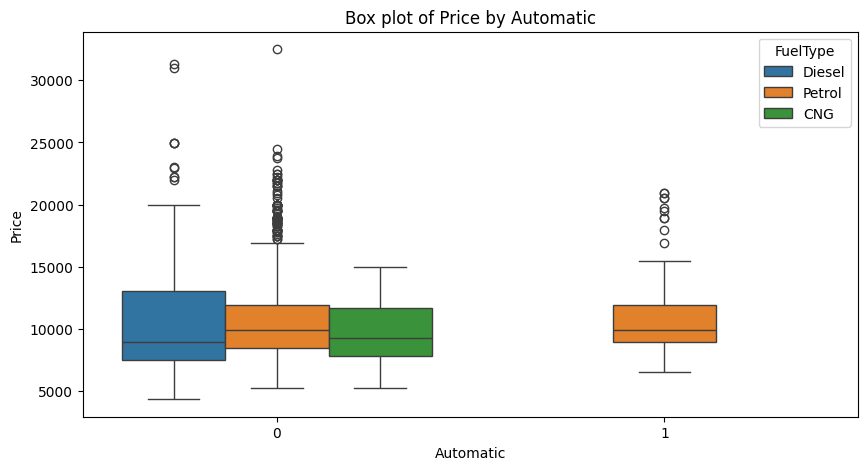

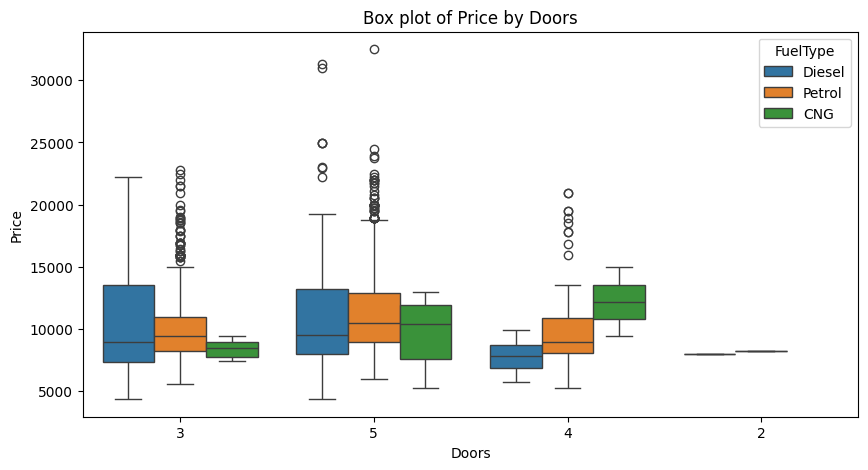

In [111]:
# Box plots for numerical vs categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1[feature], y=df1['Price'],hue="FuelType", data=df1)
    plt.title(f'Box plot of Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

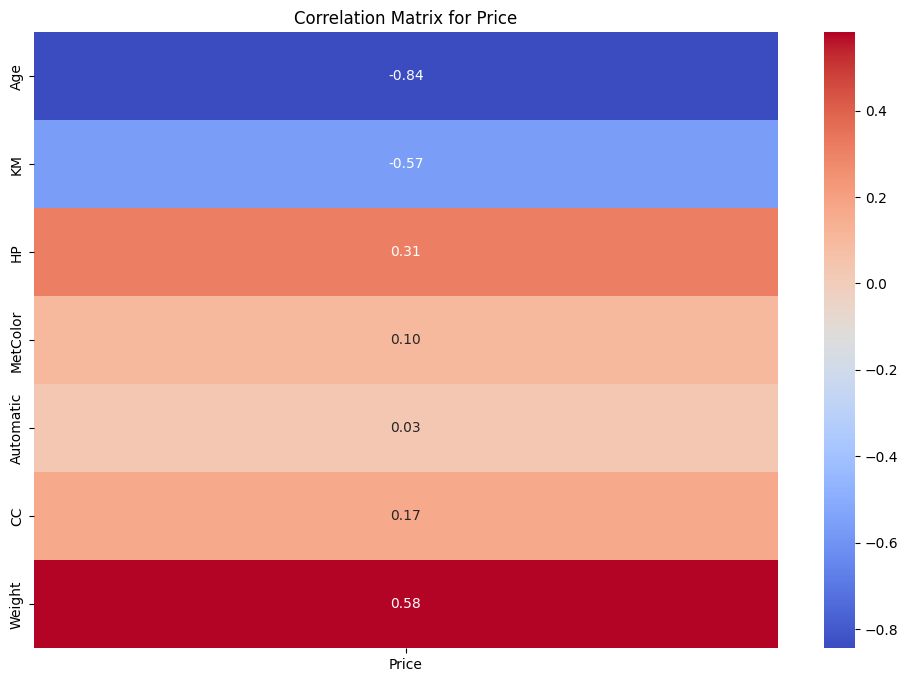

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# If you specifically want the correlation of 'Price' with other columns
if 'Price' in numeric_df.columns:
    price_corr = corr_matrix[['Price']].drop('Price')  # Exclude self-correlation
    plt.figure(figsize=(12, 8))
    sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for Price')
else:
    print("Column 'Price' not found in numeric data")

plt.show()

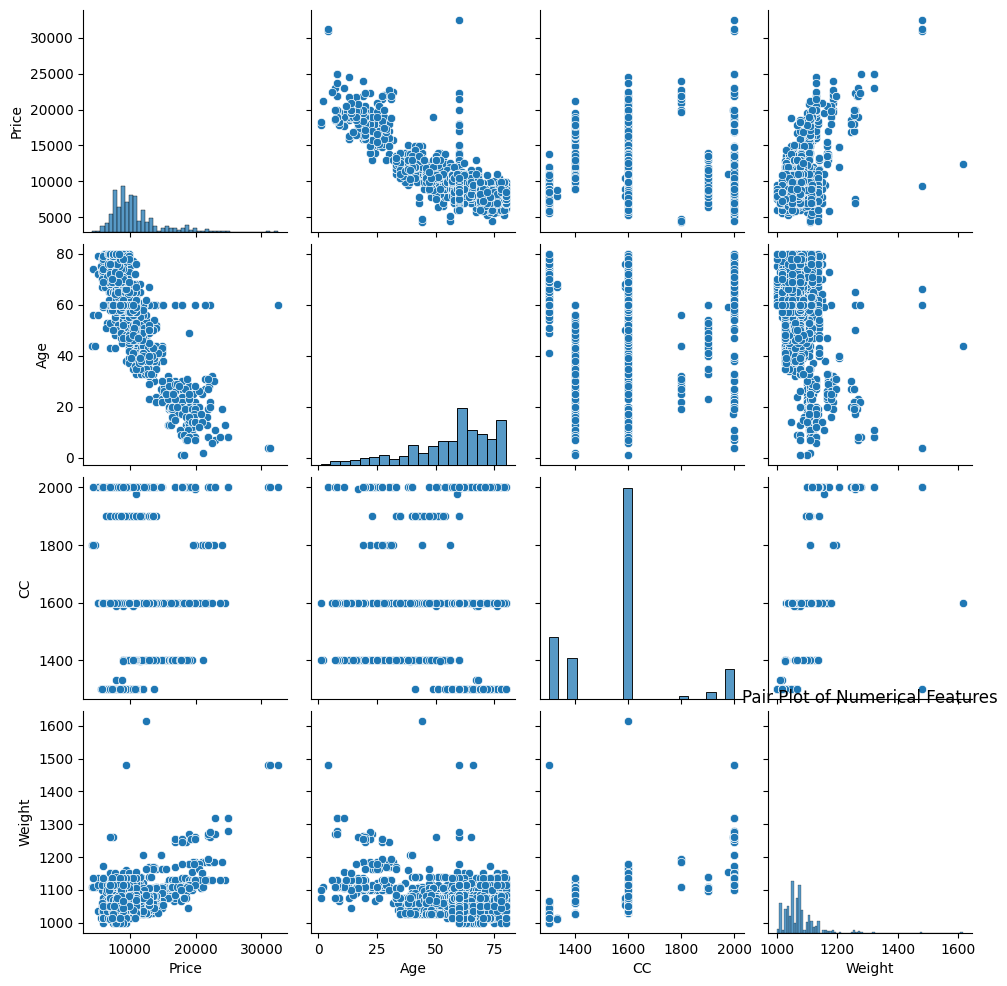

In [116]:
# Pair plots
sns.pairplot(df[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()

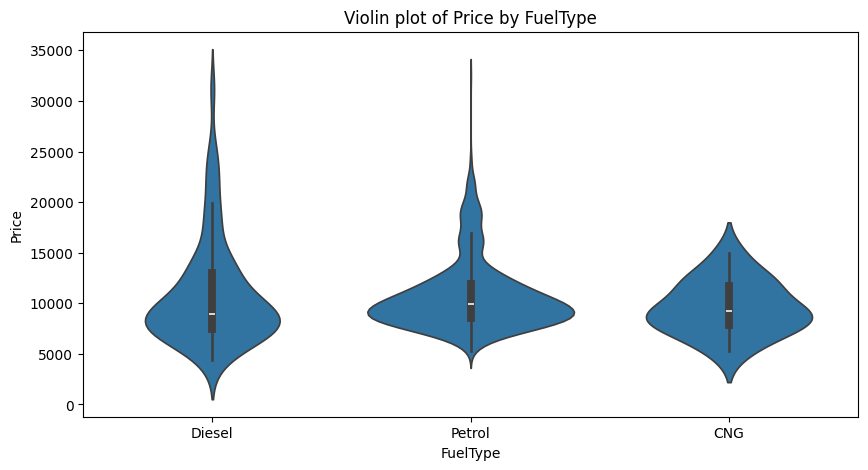

In [117]:
# Advanced Visualizations
# Example: Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=df['FuelType'], y=df['Price'])
plt.title('Violin plot of Price by FuelType')
plt.xlabel('FuelType')
plt.ylabel('Price')
plt.show()

In [128]:
from google.colab import files
df1.to_csv('clean_car.csv', index=False)

In [130]:
files.download('clean_car.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>